# Worksheet 12

Name:  Sungjun Park 
UID: U24688282

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Y
2. N
3. N
4. N

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Set up a machine learning model by splitting your data into training and test sets, train the model, evaluate its performance on the test set, optionally use cross-validation and hyperparameter tuning for improvement, and then deploy the final model for monitoring on new data to assess its generalization capabilities.


c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is where the model has too many dropout layers such that the accuracy when testing the data with the training data is too low.
Overfitting is where the model is designed too closely to the training data such that testign data with training data is too high. In turn, this is also bad because the model might underpreform when given data it hasn't seen before.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

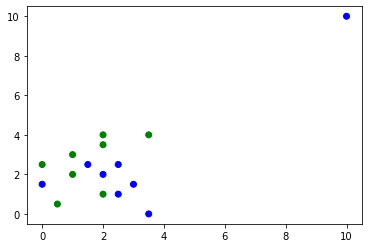

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.figure(facecolor='white')
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The point at (10, 10) is an outlier, you can do so by creating a threshold

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Not particularly one point that stands out.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

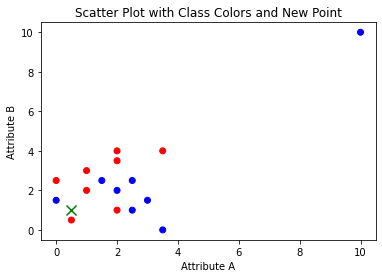

In [10]:

# New point (0.5, 1)
new_point = [0.5, 1]

colors = np.array(['b', 'r'])

plt.figure(facecolor="white")
plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]])
plt.scatter(new_point[0], new_point[1], color='g', marker='x', s=100)  # Plotting the new point in green
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("Scatter Plot with Class Colors and New Point")
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[(0.5, 13), (0.7071067811865476, 1), (1.118033988749895, 2)]


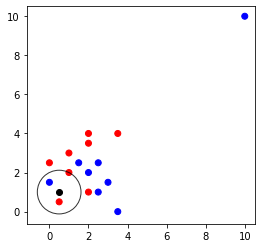

<Figure size 432x288 with 0 Axes>

In [12]:
def n_closest_to(example, n):
    ans = []
    while len(ans) < 3:
        for i in range(len(data["Attribute A"])):
            dist = np.sqrt((example[0] - data["Attribute A"][i])**2 + (example[1] - data["Attribute B"][i])**2)
            ans.append((dist, i))
    ans.sort(key=lambda x: x[0])
    return ans[:n]

location = ( 0.5 , 1 )
ans = n_closest_to(location, 3)
radius = ans[-1][0]
print(ans)
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(0.5, 1, color='k')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [13]:
def majority(points):
    # Count the occurrences of each class
    class_counts = {0: 0, 1: 0}
    for point in points:
        class_counts[point["Class"]] += 1
    
    # Determine the majority class
    majority_class = max(class_counts, key=class_counts.get)
    
    # Default class for tie-breaking
    default_class = 0
    
    # Check for ties and use the default class
    if list(class_counts.values()).count(class_counts[majority_class]) > 1:
        return default_class
    else:
        return majority_class

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [ ]:
count = 0
total_points = len(data)

for i in range(total_points):
    actual_class = data["Class"][i]
    # Create a training set without the i-th point
    training_set = data[:i] + data[i + 1:]
    # Classify the i-th point using the majority function and the training set
    prediction = majority(training_set)
    if prediction == actual_class:
        count += 1

overall_accuracy = count / total_points
print("Overall Accuracy =", overall_accuracy)
